In [1]:
import numpy as np
import scipy as sc
import pickle
import sys
import os
import matplotlib.pyplot as plt
from skimage import io
from skimage import transform
import skimage

np.random.seed(1)

In [52]:
#rotates image (img) by X degrees (degree) in a counter clock-wise fashion
def rotateImage(img,degree):
    curList = []

    for i in range(0,len(img)):
        t=skimage.transform.rotate(img[i],degree)
        curList.append(t)

    newArr = np.stack(curList)
    return(newArr)

In [3]:
#flips image vertically
def vFlipImage(img1):
    curList = []

    for i in range(0,len(img1)):
        t = np.flip(img1[i],axis=0)
        curList.append(t)

    newArr = np.stack(curList)
    return(newArr)

In [4]:
#flips image horizontally
def hFlipImage(img2):
    curList = []

    for i in range(0,len(img2)):
        t = np.flip(img2[i],axis=1)
        curList.append(t)

    newArr = np.stack(curList)
    return(newArr)

In [49]:
def randomImgChange(img3):
    hFlipRand = np.random.rand(1) < .5
    vFlipRand = np.random.rand(1) < .5
    
    degree = np.random.randint(0,180)
    
    print(hFlipRand)
    print(vFlipRand)
    print(degree)
    
    if hFlipRand == True:
        img3 = hFlipImage(img3)
    if vFlipRand == True:
        img3 = vFlipImage(img3)
        
    plt.imshow(img3[100])
    plt.show()
    img3 = rotateImage(img3,degree)
    return(img3)

In [ ]:
def manyRandImg(img,num):
    

In [6]:
curDir = os.getcwd()
print(curDir)

tiffFile ='../../data/Oryza_barthii_NEW.lif - Series003 - C=1.tif'

C:\Users\lina627\Desktop\gs\cse546\pyPhy\src\notebooks


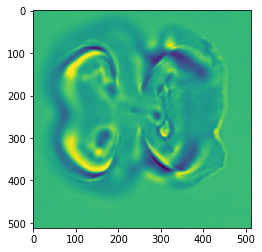

[ True]
[ True]
56


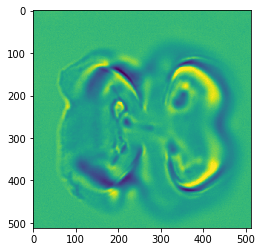

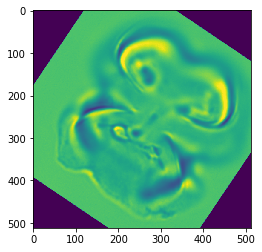

In [60]:
im = io.imread(tiffFile)

plt.imshow(im[100])
plt.show()

tmpImg = randomImgChange(im)
plt.imshow(tmpImg[100])
plt.show()